<a href="https://colab.research.google.com/github/Abudhagir/3D-Vision/blob/main/Copy_of_ProHMR_Demo_Astitva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install OpenPose (~20 mins)

In [1]:
import os
from os.path import exists, join, basename, splitext

git_repo_url = 'https://github.com/AstitvaSri/openpose.git'
project_name = splitext(basename(git_repo_url))[0]
if not exists(project_name):
  # see: https://github.com/CMU-Perceptual-Computing-Lab/openpose/issues/949
  # install new CMake becaue of CUDA10
  !wget -q https://cmake.org/files/v3.13/cmake-3.13.0-Linux-x86_64.tar.gz
  !tar xfz cmake-3.13.0-Linux-x86_64.tar.gz --strip-components=1 -C /usr/local
  # clone openpose
  !git clone -q --depth 1 $git_repo_url
  !sed -i 's/execute_process(COMMAND git checkout master WORKING_DIRECTORY ${CMAKE_SOURCE_DIR}\/3rdparty\/caffe)/execute_process(COMMAND git checkout f019d0dfe86f49d1140961f8c7dec22130c83154 WORKING_DIRECTORY ${CMAKE_SOURCE_DIR}\/3rdparty\/caffe)/g' openpose/CMakeLists.txt
  # install system dependencies
  !apt-get -qq install -y libatlas-base-dev libprotobuf-dev libleveldb-dev libsnappy-dev libhdf5-serial-dev protobuf-compiler libgflags-dev libgoogle-glog-dev liblmdb-dev opencl-headers ocl-icd-opencl-dev libviennacl-dev

# build openpose
!cd openpose && rm -rf build || true && mkdir build && cd build && cmake -DUSE_CUDNN=OFF .. && make -j`nproc`

Selecting previously unselected package libgflags2.2.
(Reading database ... 122531 files and directories currently installed.)
Preparing to unpack .../00-libgflags2.2_2.2.2-1build1_amd64.deb ...
Unpacking libgflags2.2 (2.2.2-1build1) ...
Selecting previously unselected package libgflags-dev.
Preparing to unpack .../01-libgflags-dev_2.2.2-1build1_amd64.deb ...
Unpacking libgflags-dev (2.2.2-1build1) ...
Selecting previously unselected package libgoogle-glog0v5.
Preparing to unpack .../02-libgoogle-glog0v5_0.4.0-1build1_amd64.deb ...
Unpacking libgoogle-glog0v5 (0.4.0-1build1) ...
Selecting previously unselected package libgoogle-glog-dev.
Preparing to unpack .../03-libgoogle-glog-dev_0.4.0-1build1_amd64.deb ...
Unpacking libgoogle-glog-dev (0.4.0-1build1) ...
Selecting previously unselected package libleveldb1d:amd64.
Preparing to unpack .../04-libleveldb1d_1.22-3ubuntu2_amd64.deb ...
Unpacking libleveldb1d:amd64 (1.22-3ubuntu2) ...
Selecting previously unselected package libleveldb-dev

# Download and install dependencies

In [2]:
!pip install yacs
!pip install smplx
!pip install pytorch_lightning
!pip install pyrender
!pip install umnn
!pip install dill==0.2.8.2
!pip install chumpy

!cd /content && git clone https://github.com/AstitvaSri/nflows.git
!cd /content/nflows && python setup.py install

!cd /content && git clone https://github.com/AstitvaSri/ProHMR.git
!pip install -r /content/ProHMR/colab_requirements.txt
!cd /content/ProHMR && pip install .

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.0/719.0 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 48.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 76.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 31.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 18.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

# Fetch model data

In [3]:
!cd /content/ProHMR && bash fetch_data.sh

--2023-05-19 11:16:38--  http://visiondata.cis.upenn.edu/prohmr/data.tar.gz
Resolving visiondata.cis.upenn.edu (visiondata.cis.upenn.edu)... 158.130.68.16
Connecting to visiondata.cis.upenn.edu (visiondata.cis.upenn.edu)|158.130.68.16|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 641669120 (612M) [application/x-gzip]
Saving to: ‘data.tar.gz’

data.tar.gz         100%[===================>] 611.94M  74.8MB/s    in 11s     

2023-05-19 11:16:48 (57.6 MB/s) - ‘data.tar.gz’ saved [641669120/641669120]

data/
data/SMPL_to_J19.pkl
data/smpl_mean_params.npz
data/checkpoint.pt
--2023-05-19 11:16:50--  http://visiondata.cis.upenn.edu/prohmr/datasets.tar.gz
Resolving visiondata.cis.upenn.edu (visiondata.cis.upenn.edu)... 158.130.68.16
Connecting to visiondata.cis.upenn.edu (visiondata.cis.upenn.edu)|158.130.68.16|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 251111104 (239M) [application/x-gzip]
Saving to: ‘datasets.tar.gz’

datasets.tar.gz   

# Fetch SMPL model

In [4]:
# We are downloading the SMPL model here for convenience. Please accept the license
# agreement on the SMPL website: https://smpl.is.tue.mpg.
!mkdir -p /content/ProHMR/data/smpl
!wget https://github.com/classner/up/raw/master/models/3D/basicModel_neutral_lbs_10_207_0_v1.0.0.pkl

--2023-05-19 11:17:42--  https://github.com/classner/up/raw/master/models/3D/basicModel_neutral_lbs_10_207_0_v1.0.0.pkl
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/classner/up/master/models/3D/basicModel_neutral_lbs_10_207_0_v1.0.0.pkl [following]
--2023-05-19 11:17:42--  https://raw.githubusercontent.com/classner/up/master/models/3D/basicModel_neutral_lbs_10_207_0_v1.0.0.pkl
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 39001280 (37M) [application/octet-stream]
Saving to: ‘basicModel_neutral_lbs_10_207_0_v1.0.0.pkl’

basicModel_neutral_ 100%[===================>]  37.19M   186MB/s    in 0

In [5]:
# Convert SMPL pkl file to be compatible with Python 3
# Script is from https://rebeccabilbro.github.io/convert-py2-pickles-to-py3/
import os
import dill
import pickle
import argparse

def convert(old_pkl):
    """
    Convert a Python 2 pickle to Python 3
    """
    # Make a name for the new pickle
    new_pkl = os.path.splitext(os.path.basename(old_pkl))[0]+"_p3.pkl"

    # Convert Python 2 "ObjectType" to Python 3 object
    dill._dill._reverse_typemap["ObjectType"] = object

    # Open the pickle using latin1 encoding
    with open(old_pkl, "rb") as f:
        loaded = pickle.load(f, encoding="latin1")

    # Re-save as Python 3 pickle
    with open(new_pkl, "wb") as outfile:
        pickle.dump(loaded, outfile)

convert('basicModel_neutral_lbs_10_207_0_v1.0.0.pkl')
!rm basicModel_neutral_lbs_10_207_0_v1.0.0.pkl
!mv basicModel_neutral_lbs_10_207_0_v1.0.0_p3.pkl ProHMR/data/smpl/SMPL_NEUTRAL.pkl

<ipython-input-5-2bf7fe892b6e>:20: DeprecationWarning: Please use `csc_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csc` namespace is deprecated.
  loaded = pickle.load(f, encoding="latin1")


# Download sample images from internet



In [6]:
### BE CAREFUL WITH THE BELOW COMMAND ###
!rm -r /content/3dvss_day6_data
!rm -r /content/images
# !mkdir -p /content/images
!git clone https://github.com/AmoghTiwari/3dvss_day6_data/
!mv 3dvss_day6_data/images.zip ./
!unzip images.zip

rm: cannot remove '/content/3dvss_day6_data': No such file or directory
rm: cannot remove '/content/images': No such file or directory
Cloning into '3dvss_day6_data'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 19 (delta 6), reused 13 (delta 3), pack-reused 0
Unpacking objects: 100% (19/19), 212.87 KiB | 2.17 MiB/s, done.
Archive:  images.zip
   creating: images/
  inflating: images/3.jpg            
  inflating: images/2.jpg            
  inflating: images/1.jpg            


In [7]:
!ls

3dvss_day6_data			  images      nflows	ProHMR
cmake-3.13.0-Linux-x86_64.tar.gz  images.zip  openpose	sample_data


In [9]:
!rm -r /content/images
!mkdir -p /content/images

!cd /content/images && wget https://us.123rf.com/450wm/stunningart/stunningart1903/stunningart190300109/119522996-side-view-handsome-young-man-wearing-casual-jeans-and-t-shirt-sitting-relaxed-on-the-floor-looking.jpg
!cd /content/images && wget https://images.toofab.com/image/02/4by3/2020/08/14/02d3d39960bc498e834bd879be50d033_md.jpg
!cd /content/images && wget https://i0.wp.com/post.healthline.com/wp-content/uploads/2020/10/Female_Yoga_1296x728-header-1296x729.jpg

--2023-05-19 11:31:02--  https://us.123rf.com/450wm/stunningart/stunningart1903/stunningart190300109/119522996-side-view-handsome-young-man-wearing-casual-jeans-and-t-shirt-sitting-relaxed-on-the-floor-looking.jpg
Resolving us.123rf.com (us.123rf.com)... 65.8.49.57, 65.8.49.4, 65.8.49.13, ...
Connecting to us.123rf.com (us.123rf.com)|65.8.49.57|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 71516 (70K) [image/jpeg]
Saving to: ‘119522996-side-view-handsome-young-man-wearing-casual-jeans-and-t-shirt-sitting-relaxed-on-the-floor-looking.jpg’

119522996-side-view 100%[===================>]  69.84K  --.-KB/s    in 0.01s   

2023-05-19 11:31:03 (5.08 MB/s) - ‘119522996-side-view-handsome-young-man-wearing-casual-jeans-and-t-shirt-sitting-relaxed-on-the-floor-looking.jpg’ saved [71516/71516]

--2023-05-19 11:31:03--  https://images.toofab.com/image/02/4by3/2020/08/14/02d3d39960bc498e834bd879be50d033_md.jpg
Resolving images.toofab.com (images.toofab.com)... 151.101.2

# (OR) Upload your own images
- Uncomment the below lines to do this

In [42]:
!rm -r /content/images
!mkdir -p /content/images

import os
from google.colab import files
import shutil


uploaded = files.upload()
for filename in uploaded.keys():
    dst_path = os.path.join('/content/images/', filename)
    shutil.move(filename, dst_path)


Saving one.jpeg to one.jpeg


# Clear existing outputs

In [43]:
! rm -r /content/output/*
! rm -r /content/keypoints/*
! rm -r /content/output_smpl_meshes/*

# Run OpenPose

In [44]:
# remove hidden folder ".ipynb_checkpoints" as it also gets included while reading directory
!cd /content && rm -rf `find -type d -name .ipynb_checkpoints`

!cd /content/openpose && ./build/examples/openpose/openpose.bin --image_dir ../images/ --write_json ../keypoints --display 0 --render_pose 0

Starting OpenPose demo...
Configuring OpenPose...
Starting thread(s)...
Auto-detecting all available GPUs... Detected 1 GPU(s), using 1 of them starting at GPU 0.
OpenPose demo successfully finished. Total time: 1.277124 seconds.


# (OR) Use Existing OP-Keypoints

In [ ]:
# !rm -r /content/3dvss_day6_data
# !rm -r /content/keypoints
# !git clone https://github.com/AmoghTiwari/3dvss_day6_data/
# !mv 3dvss_day6_data/keypoints.zip ./
# !unzip keypoints.zip

Cloning into '3dvss_day6_data'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 16 (delta 5), reused 11 (delta 3), pack-reused 0
Unpacking objects: 100% (16/16), 208.96 KiB | 7.74 MiB/s, done.
Archive:  keypoints.zip
   creating: keypoints/
  inflating: keypoints/2_keypoints.json  
  inflating: keypoints/1_keypoints.json  
  inflating: keypoints/3_keypoints.json  


# Run ProHMR + Fitting

In [45]:
# We use the demo code provided by the repo
# remove hidden folder ".ipynb_checkpoints" as it also gets included while reading directory

!cd /content && rm -rf `find -type d -name .ipynb_checkpoints

!cd /content/ProHMR && python demo.py --img_folder=../images --keypoint_folder=../keypoints --out_folder=../output --run_fitting --full_frame --batch_size=64

/bin/bash: -c: line 0: unexpected EOF while looking for matching ``'
/bin/bash: -c: line 1: syntax error: unexpected end of file
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/migration/migration.py:201: PossibleUserWarning: You have multiple `ModelCheckpoint` callback states in this checkpoint, but we found state keys that would end up colliding with each other after an upgrade, which means we can't differentiate which of your checkpoint callbacks needs which states. At least one of your `ModelCheckpoint` callbacks will not be able to reload the state.
  rank_zero_warn(
Lightning automatically upgraded your loaded checkpoint from v1.3.6 to v2.0.2. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint --file data/checkpoint.pt`
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/core/saving.py:158: UserWarning: Found keys that are in the model state dict but not in the checkpoint: ['smpl.shapedirs', 'smp

Fitting Image


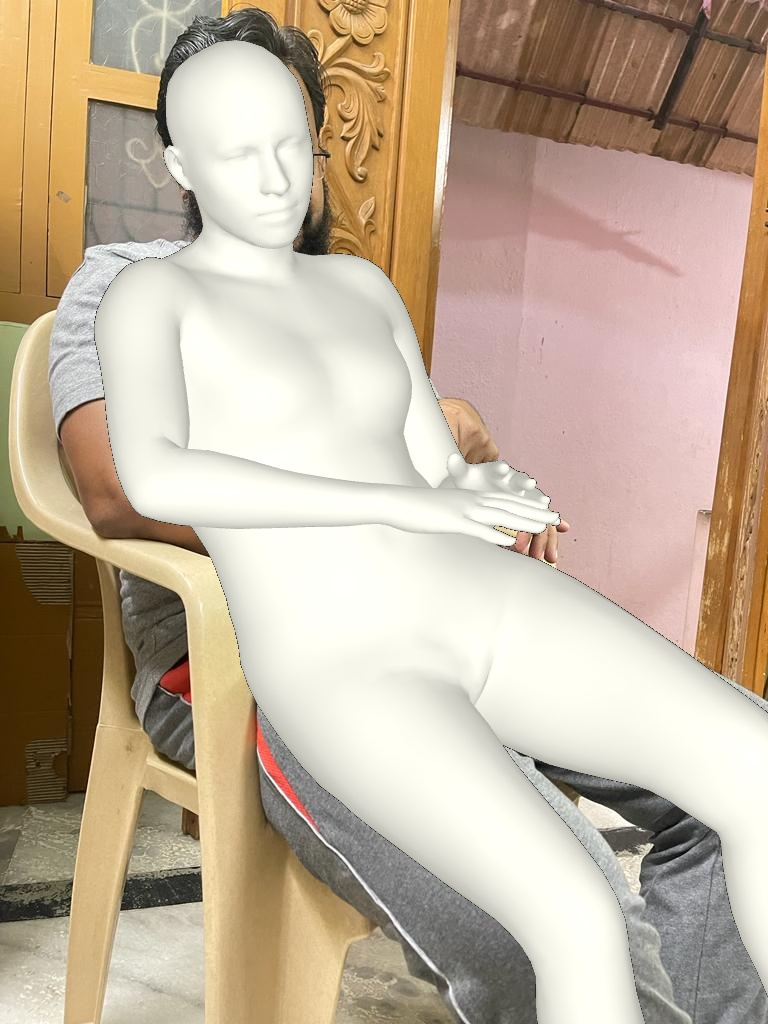

Regression Image


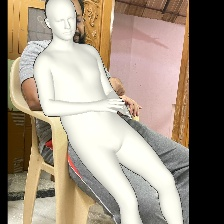

In [46]:
import cv2
from google.colab.patches import cv2_imshow
#img_fitting = cv2.imread("output/1_fitting.jpg")
#img_fitting = cv2.imread("output/Abuphoto_fitting.jpg")
img_fitting = cv2.imread("output/one_fitting.jpg")
print("Fitting Image")
cv2_imshow(img_fitting)

print("Regression Image")
img_regression = cv2.imread("output/one_regression.jpg")
#img_regression = cv2.imread("output/Abuphoto_regression.jpg")
cv2_imshow(img_regression)

In [48]:
!pip install trimesh

import trimesh

mesh = trimesh.load('output_smpl_meshes/one._fitting.obj')
scene = trimesh.scene.Scene()
scene.add_geometry(mesh)
# visualization package
scene.show()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
